<a href="https://colab.research.google.com/github/karthik8548/SCT_DS/blob/main/SCT_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
(28831, 53) (12357, 53) (28831,) (12357,)
Accuracy: 88.99%
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     10968
        True       0.51      0.52      0.51      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.73      0.73     12357
weighted avg       0.89      0.89      0.89     12357

Confusion Matrix:
[[10275   693]
 [  668   721]]


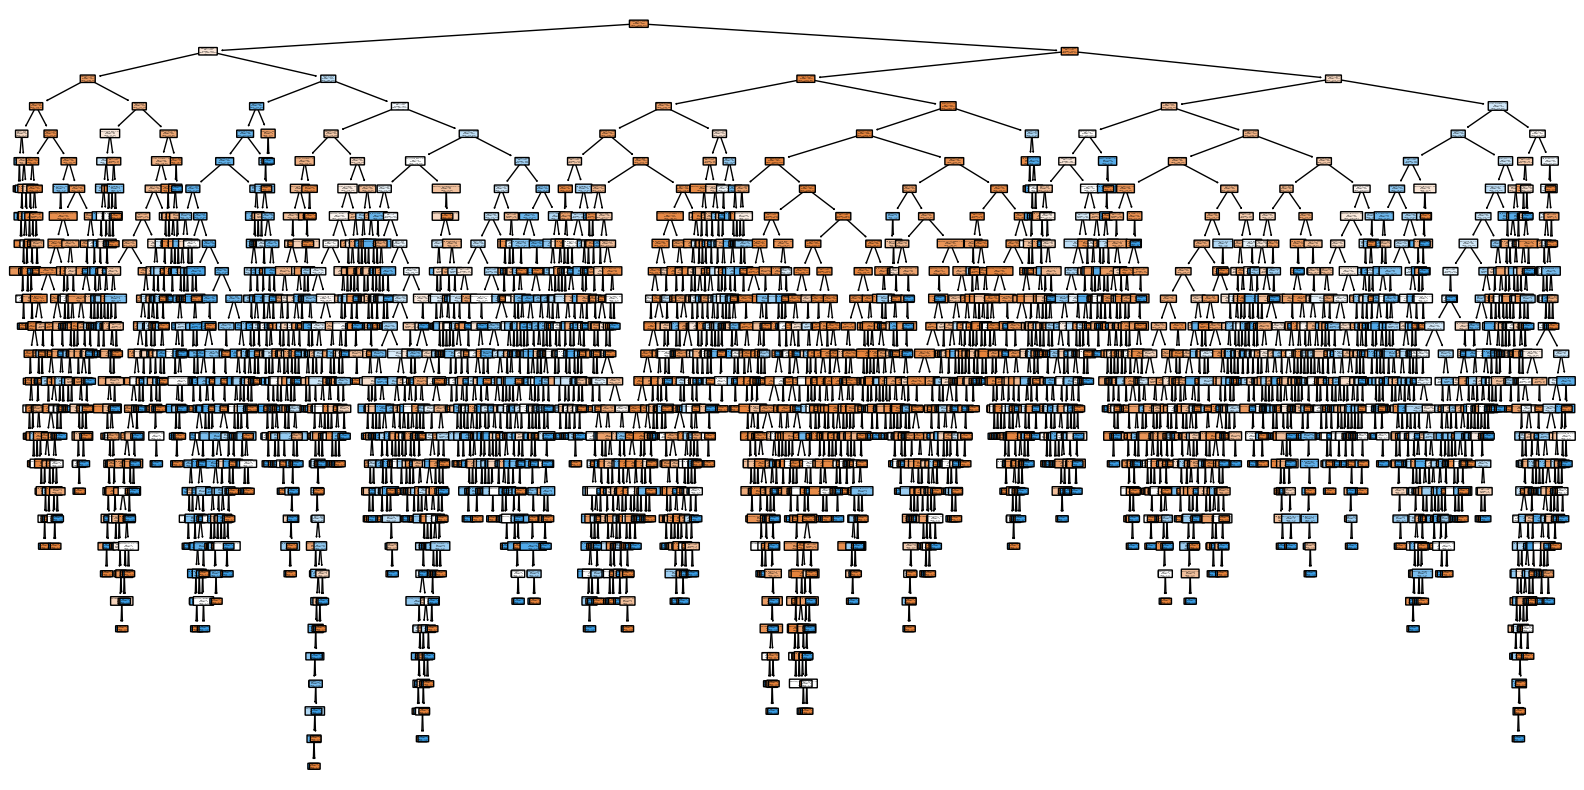

Tuned Model Accuracy: 91.62%


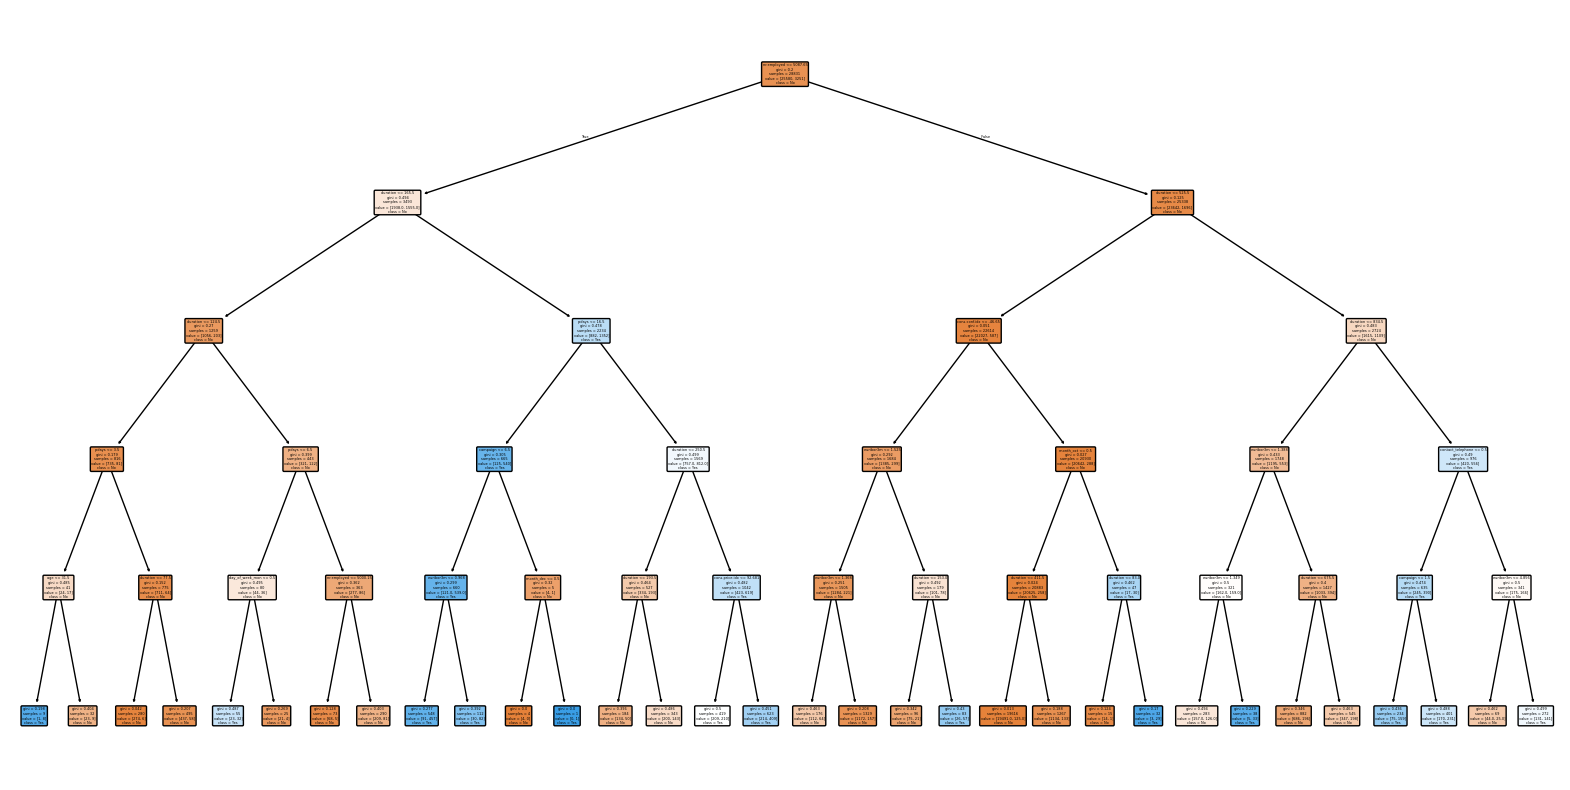

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset - using the correct URL
url = 'https://raw.githubusercontent.com/HegdeChaitra/Bank-Marketing-Campaign-Analysis/master/bank-additional-full.csv'
bank_data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
bank_data.head()

# Display the first few rows of the dataset
bank_data.head()
# Checking for missing values
print(bank_data.isnull().sum())  # No missing values in the dataset

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical using label encoding or one-hot encoding
categorical_cols = bank_data.select_dtypes(include=['object']).columns
bank_data_encoded = pd.get_dummies(bank_data, columns=categorical_cols, drop_first=True)

# Display the transformed dataset
bank_data_encoded.head()
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = bank_data_encoded.drop('y_yes', axis=1)  # 'y_yes' is the encoded target variable for purchase
y = bank_data_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the train/test split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
# Tuning the decision tree
clf_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the tuned model
clf_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = clf_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned * 100:.2f}%")

# Plot the tuned decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf_tuned, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
